In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import sympy as sp
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import scale
import scipy as sp
from scipy.optimize import rosen_der
fig = plt.figure()
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
price = pd.read_csv("/Users/wangshuyi/Desktop/rug course content/Financial Econometrics/prices.csv")

In [3]:
price = price[['symbol', 'date', 'adjusted', 'close' ,'shares_held']]
price['date'] = pd.to_datetime(price['date'])
price['year'] = price['date'].dt.year
price['month'] = price['date'].dt.month
df = price.groupby(['year','month','symbol']).tail(1)
df = df.apply(lambda x: x)
df['mktcap'] = df['close'] * df['shares_held']
df['day'] = 1
df['Date'] = pd.to_datetime(df[['year','month','day']])
df = df.drop('date',axis=1)
df = df.set_index('Date')
df_price = pd.pivot_table(df, values='adjusted', index=df.index,columns=df['symbol'])
mktcap = pd.pivot_table(df, values='mktcap',index=df.index,columns=df['symbol'])

In [4]:
mktcap

symbol,A,AAL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-01,9.307007e+07,7.125584e+07,3.086544e+07,NaN,4.599708e+07,5.608519e+08,2.557660e+08,2.057825e+08,1.240409e+08,2.987049e+08,...,1.434725e+08,6.542933e+07,4.341016e+09,1.139723e+08,1.027834e+08,NaN,9.899004e+07,1.872044e+08,1.314954e+08,NaN
2008-02-01,8.413688e+07,6.384193e+07,2.893311e+07,NaN,4.119790e+07,5.345963e+08,2.604204e+08,1.982417e+08,1.177427e+08,3.063117e+08,...,1.149693e+08,6.689529e+07,4.407372e+09,1.077094e+08,9.792063e+07,NaN,9.983041e+07,1.803765e+08,1.147042e+08,NaN
2008-03-01,8.199292e+07,4.587352e+07,2.937306e+07,NaN,4.046716e+07,5.505693e+08,2.598293e+08,2.096708e+08,1.291145e+08,2.795519e+08,...,9.421361e+07,7.105380e+07,4.284284e+09,1.064955e+08,9.971917e+07,NaN,1.078284e+08,1.865336e+08,1.094194e+08,NaN
2008-04-01,8.303741e+07,4.422598e+07,2.991653e+07,NaN,4.004254e+07,5.266098e+08,2.774123e+08,2.196859e+08,1.408801e+08,2.992483e+08,...,1.112390e+08,7.410538e+07,4.714333e+09,1.072404e+08,9.305791e+07,NaN,1.178839e+08,1.776693e+08,1.113411e+08,NaN
2008-05-01,1.027729e+08,2.038823e+07,3.476459e+07,NaN,4.081278e+07,5.625490e+08,3.015705e+08,2.595699e+08,1.535641e+08,2.696359e+08,...,1.113028e+08,8.137530e+07,4.496016e+09,1.118479e+08,9.046002e+07,NaN,1.150440e+08,1.744110e+08,1.035100e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-01,2.614151e+08,2.410548e+08,7.051260e+07,1.719839e+09,1.519740e+08,1.128355e+09,1.051729e+09,1.031917e+09,3.993279e+08,2.775823e+08,...,1.290296e+08,2.204613e+08,4.221980e+09,1.684891e+08,7.662219e+07,1.424578e+08,3.000996e+08,2.913719e+08,1.116054e+08,3.735200e+08
2017-11-01,2.660647e+08,2.599499e+08,8.712714e+07,1.846945e+09,1.675170e+08,1.172882e+09,1.093470e+09,1.069091e+09,3.766278e+08,2.708584e+08,...,1.237690e+08,2.079558e+08,4.218941e+09,1.848773e+08,7.497903e+07,1.484747e+08,3.364582e+08,2.805430e+08,1.190281e+08,4.230924e+08
2017-12-01,2.573419e+08,2.678787e+08,8.599708e+07,1.842943e+09,1.813418e+08,1.187447e+09,1.131000e+09,1.032388e+09,3.893993e+08,2.722168e+08,...,1.120999e+08,2.017030e+08,4.236670e+09,1.816217e+08,7.368977e+07,1.460337e+08,3.289608e+08,2.890959e+08,1.221029e+08,4.216292e+08


In [5]:
have_null = df_price.columns[df_price.isna().any()]
have_null.append(df_price.columns[df_price.isna().any()])
df_price = df_price.drop(columns=have_null)
ret = np.log(df_price).diff()
ret = ret.iloc[1::,:]

In [6]:
have_null = mktcap.columns[mktcap.isna().any()]
have_null.append(mktcap.columns[mktcap.isna().any()])
mktcap = mktcap.drop(columns=have_null)
mktcap = mktcap.iloc[1::,:]
mktcap

symbol,A,AAL,AAP,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,...,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,8.413688e+07,6.384193e+07,2.893311e+07,4.119790e+07,5.345963e+08,2.604204e+08,1.982417e+08,1.177427e+08,3.063117e+08,1.872429e+08,...,5.870079e+07,1.199245e+08,1.149693e+08,6.689529e+07,4.407372e+09,1.077094e+08,9.792063e+07,9.983041e+07,1.803765e+08,1.147042e+08
2008-03-01,8.199292e+07,4.587352e+07,2.937306e+07,4.046716e+07,5.505693e+08,2.598293e+08,2.096708e+08,1.291145e+08,2.795519e+08,1.986791e+08,...,6.097308e+07,1.207111e+08,9.421361e+07,7.105380e+07,4.284284e+09,1.064955e+08,9.971917e+07,1.078284e+08,1.865336e+08,1.094194e+08
2008-04-01,8.303741e+07,4.422598e+07,2.991653e+07,4.004254e+07,5.266098e+08,2.774123e+08,2.196859e+08,1.408801e+08,2.992483e+08,2.071624e+08,...,6.939391e+07,1.258542e+08,1.112390e+08,7.410538e+07,4.714333e+09,1.072404e+08,9.305791e+07,1.178839e+08,1.776693e+08,1.113411e+08
2008-05-01,1.027729e+08,2.038823e+07,3.476459e+07,4.081278e+07,5.625490e+08,3.015705e+08,2.595699e+08,1.535641e+08,2.696359e+08,2.017724e+08,...,7.589890e+07,1.289400e+08,1.113028e+08,8.137530e+07,4.496016e+09,1.118479e+08,9.046002e+07,1.150440e+08,1.744110e+08,1.035100e+08
2008-06-01,9.768784e+07,1.287136e+07,3.349651e+07,3.948955e+07,5.288061e+08,3.008317e+08,2.320576e+08,1.389556e+08,2.292244e+08,1.963825e+08,...,7.760311e+07,1.214372e+08,6.555099e+07,7.554141e+07,4.464104e+09,1.015294e+08,9.032678e+07,1.016850e+08,1.630312e+08,7.564471e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-01,2.614151e+08,2.410548e+08,7.051260e+07,1.519740e+08,1.128355e+09,1.051729e+09,1.031917e+09,3.993279e+08,2.775823e+08,6.206443e+08,...,1.302445e+08,2.996298e+08,1.290296e+08,2.204613e+08,4.221980e+09,1.684891e+08,7.662219e+07,3.000996e+08,2.913719e+08,1.116054e+08
2017-11-01,2.660647e+08,2.599499e+08,8.712714e+07,1.675170e+08,1.172882e+09,1.093470e+09,1.069091e+09,3.766278e+08,2.708584e+08,6.110351e+08,...,1.293311e+08,3.122758e+08,1.237690e+08,2.079558e+08,4.218941e+09,1.848773e+08,7.497903e+07,3.364582e+08,2.805430e+08,1.190281e+08
2017-12-01,2.573419e+08,2.678787e+08,8.599708e+07,1.813418e+08,1.187447e+09,1.131000e+09,1.032388e+09,3.893993e+08,2.722168e+08,6.256090e+08,...,1.359029e+08,2.910984e+08,1.120999e+08,2.017030e+08,4.236670e+09,1.816217e+08,7.368977e+07,3.289608e+08,2.890959e+08,1.221029e+08


In [7]:
m12 = ret.rolling(12).sum()
m12 = m12.iloc[11::,:]

In [8]:
ret = ret.iloc[12::,:]
mktcap.iloc[11::,:]

symbol,A,AAL,AAP,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,...,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,4.969601e+07,2.919224e+07,2.823437e+07,3.586547e+07,5.534644e+08,2.331593e+08,1.137607e+08,8.738850e+07,1.859604e+08,1.702763e+08,...,2.766846e+07,1.116956e+08,9.246006e+06,5.041080e+07,3.873990e+09,7.424337e+07,4.423082e+07,8.293603e+07,8.720552e+07,3.584056e+07
2009-02-01,3.812410e+07,1.467335e+07,3.299617e+07,3.136254e+07,4.726011e+08,2.156502e+08,9.838443e+07,8.152761e+07,1.810703e+08,1.600587e+08,...,2.188749e+07,1.073391e+08,1.055320e+07,5.289395e+07,3.439382e+09,6.378695e+07,3.450537e+07,7.615510e+07,8.389938e+07,2.250845e+07
2009-03-01,4.224711e+07,1.302581e+07,3.543746e+07,3.225128e+07,4.761950e+08,2.030910e+08,1.260145e+08,8.428311e+07,1.886772e+08,1.647925e+08,...,2.047287e+07,1.127242e+08,1.740800e+07,5.732172e+07,3.449512e+09,7.407783e+07,3.030877e+07,7.963249e+07,8.744509e+07,2.361345e+07
2009-04-01,5.019077e+07,1.951298e+07,3.774072e+07,3.321901e+07,4.177937e+08,2.174233e+08,1.611266e+08,9.307445e+07,1.672150e+08,1.649800e+08,...,2.996302e+07,1.115746e+08,3.032052e+07,6.115115e+07,3.377077e+09,7.896118e+07,4.070034e+07,9.664279e+07,1.053893e+08,2.625585e+07
2009-05-01,5.010831e+07,1.328324e+07,3.674005e+07,3.663571e+07,4.498395e+08,2.211172e+08,1.660164e+08,1.067644e+08,1.869113e+08,1.781503e+08,...,3.633434e+07,1.037692e+08,3.226537e+07,6.204867e+07,3.512829e+09,8.072691e+07,4.529662e+07,1.003520e+08,1.067309e+08,3.286185e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-01,2.614151e+08,2.410548e+08,7.051260e+07,1.519740e+08,1.128355e+09,1.051729e+09,1.031917e+09,3.993279e+08,2.775823e+08,6.206443e+08,...,1.302445e+08,2.996298e+08,1.290296e+08,2.204613e+08,4.221980e+09,1.684891e+08,7.662219e+07,3.000996e+08,2.913719e+08,1.116054e+08
2017-11-01,2.660647e+08,2.599499e+08,8.712714e+07,1.675170e+08,1.172882e+09,1.093470e+09,1.069091e+09,3.766278e+08,2.708584e+08,6.110351e+08,...,1.293311e+08,3.122758e+08,1.237690e+08,2.079558e+08,4.218941e+09,1.848773e+08,7.497903e+07,3.364582e+08,2.805430e+08,1.190281e+08
2017-12-01,2.573419e+08,2.678787e+08,8.599708e+07,1.813418e+08,1.187447e+09,1.131000e+09,1.032388e+09,3.893993e+08,2.722168e+08,6.256090e+08,...,1.359029e+08,2.910984e+08,1.120999e+08,2.017030e+08,4.236670e+09,1.816217e+08,7.368977e+07,3.289608e+08,2.890959e+08,1.221029e+08


In [9]:
mktcap = mktcap.iloc[11::,:]

In [10]:
ret

symbol,A,AAL,AAP,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,...,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2009-02-01,-0.265078,-0.687870,0.155851,-0.131481,-0.157946,-0.078064,-0.145214,-0.069422,-0.021734,-0.061881,...,-0.232031,-0.039784,0.132238,0.056426,-0.113967,-0.151800,-0.248307,-0.085298,-0.038650,-0.462396
2009-03-01,0.102689,-0.119100,0.072912,0.027943,0.007576,-0.060004,0.247515,0.044265,0.041152,0.038727,...,-0.066815,0.061712,0.528051,0.080391,0.002941,0.151489,-0.121547,0.044651,0.041393,0.047926
2009-04-01,0.172295,0.404147,0.062970,0.029565,-0.121714,0.068192,0.245793,0.099218,-0.120757,0.001137,...,0.380863,-0.010251,0.554895,0.064669,-0.021222,0.063840,0.294800,0.199984,0.186650,0.106072
2009-05-01,-0.001644,-0.384576,-0.026872,0.100707,0.073903,0.016847,0.029896,0.145714,0.116985,0.076803,...,0.194839,-0.072524,0.062170,0.022077,0.045361,0.022116,0.106996,0.037662,0.012650,0.226390
2009-06-01,0.108045,-0.059898,-0.024733,-0.044648,0.043004,0.111489,0.004249,0.015044,-0.027631,-0.061355,...,-0.140651,0.084434,0.132620,-0.013592,0.008042,0.045508,-0.041715,-0.037962,-0.044758,-0.168384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-01,0.060004,-0.014209,-0.193595,-0.072668,0.021052,0.062205,0.160546,0.057829,-0.039343,0.061550,...,0.028276,0.045444,0.025527,0.039584,0.016573,0.020848,-0.093779,0.011347,0.037959,-0.015378
2017-11-01,0.017630,0.077652,0.211577,0.102118,0.038703,0.038921,0.035390,-0.053258,-0.016447,-0.015604,...,-0.006381,0.041339,-0.041625,-0.053546,0.008492,0.092821,-0.021678,0.118129,-0.037873,0.067919
2017-12-01,-0.031122,0.030045,-0.013055,0.079299,0.012341,0.033746,-0.034934,0.033348,0.005003,0.029021,...,0.049565,-0.062670,-0.092914,-0.030529,0.004193,-0.016433,-0.008828,-0.022535,0.032031,0.025505


In [11]:
mktcap

symbol,A,AAL,AAP,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,...,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,4.969601e+07,2.919224e+07,2.823437e+07,3.586547e+07,5.534644e+08,2.331593e+08,1.137607e+08,8.738850e+07,1.859604e+08,1.702763e+08,...,2.766846e+07,1.116956e+08,9.246006e+06,5.041080e+07,3.873990e+09,7.424337e+07,4.423082e+07,8.293603e+07,8.720552e+07,3.584056e+07
2009-02-01,3.812410e+07,1.467335e+07,3.299617e+07,3.136254e+07,4.726011e+08,2.156502e+08,9.838443e+07,8.152761e+07,1.810703e+08,1.600587e+08,...,2.188749e+07,1.073391e+08,1.055320e+07,5.289395e+07,3.439382e+09,6.378695e+07,3.450537e+07,7.615510e+07,8.389938e+07,2.250845e+07
2009-03-01,4.224711e+07,1.302581e+07,3.543746e+07,3.225128e+07,4.761950e+08,2.030910e+08,1.260145e+08,8.428311e+07,1.886772e+08,1.647925e+08,...,2.047287e+07,1.127242e+08,1.740800e+07,5.732172e+07,3.449512e+09,7.407783e+07,3.030877e+07,7.963249e+07,8.744509e+07,2.361345e+07
2009-04-01,5.019077e+07,1.951298e+07,3.774072e+07,3.321901e+07,4.177937e+08,2.174233e+08,1.611266e+08,9.307445e+07,1.672150e+08,1.649800e+08,...,2.996302e+07,1.115746e+08,3.032052e+07,6.115115e+07,3.377077e+09,7.896118e+07,4.070034e+07,9.664279e+07,1.053893e+08,2.625585e+07
2009-05-01,5.010831e+07,1.328324e+07,3.674005e+07,3.663571e+07,4.498395e+08,2.211172e+08,1.660164e+08,1.067644e+08,1.869113e+08,1.781503e+08,...,3.633434e+07,1.037692e+08,3.226537e+07,6.204867e+07,3.512829e+09,8.072691e+07,4.529662e+07,1.003520e+08,1.067309e+08,3.286185e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-01,2.614151e+08,2.410548e+08,7.051260e+07,1.519740e+08,1.128355e+09,1.051729e+09,1.031917e+09,3.993279e+08,2.775823e+08,6.206443e+08,...,1.302445e+08,2.996298e+08,1.290296e+08,2.204613e+08,4.221980e+09,1.684891e+08,7.662219e+07,3.000996e+08,2.913719e+08,1.116054e+08
2017-11-01,2.660647e+08,2.599499e+08,8.712714e+07,1.675170e+08,1.172882e+09,1.093470e+09,1.069091e+09,3.766278e+08,2.708584e+08,6.110351e+08,...,1.293311e+08,3.122758e+08,1.237690e+08,2.079558e+08,4.218941e+09,1.848773e+08,7.497903e+07,3.364582e+08,2.805430e+08,1.190281e+08
2017-12-01,2.573419e+08,2.678787e+08,8.599708e+07,1.813418e+08,1.187447e+09,1.131000e+09,1.032388e+09,3.893993e+08,2.722168e+08,6.256090e+08,...,1.359029e+08,2.910984e+08,1.120999e+08,2.017030e+08,4.236670e+09,1.816217e+08,7.368977e+07,3.289608e+08,2.890959e+08,1.221029e+08


In [12]:
ret_rowmean = ret.mean(axis=1)
mktcap_rowmean = mktcap.mean(axis=1)
m12_rowmean = m12.mean(axis=1)
ret_std = ret.std(axis=1)
mkt_std = mktcap.std(axis=1)
m12_std = m12.std(axis=1)
d = {'Mean(ret)':ret_rowmean,
     'Mean(mktcap)': mktcap_rowmean,
     'Mean(m12)': m12_rowmean,
     'Sd(ret)': ret_std,
     'Sd(mktcap)': mkt_std,
     'Sd(m12_std)': m12_std}
DF = pd.DataFrame(d)
DF.iloc[1::,:]

,Mean(ret),Mean(mktcap),Mean(m12),Sd(ret),Sd(mktcap),Sd(m12_std)
Date,,,,,,
2009-02-01,-0.127997,1.426361e+08,-0.650541,0.165248,2.738141e+08,0.545081
2009-03-01,0.092375,1.554538e+08,-0.550656,0.122214,2.912484e+08,0.514952
2009-04-01,0.156280,1.710784e+08,-0.449263,0.178651,3.027500e+08,0.417736
2009-05-01,0.043453,1.805952e+08,-0.431208,0.120560,3.197818e+08,0.356389
2009-06-01,-0.000821,1.799370e+08,-0.325267,0.086233,3.221567e+08,0.368412
...,...,...,...,...,...,...
2017-10-01,0.008875,4.976097e+08,0.171851,0.065785,7.556572e+08,0.247974
2017-11-01,0.036369,5.120939e+08,0.158917,0.066267,7.744315e+08,0.235310
2017-12-01,0.010750,5.178475e+08,0.158405,0.053270,7.871839e+08,0.222991


In [13]:
DF = DF.reset_index()
dfm = pd.melt(DF, id_vars=['Date'], value_vars=['Mean(ret)','Mean(mktcap)','Mean(m12)','Sd(ret)','Sd(mktcap)','Sd(m12_std)']).dropna()

In [14]:
DF

,Date,Mean(ret),Mean(mktcap),Mean(m12),Sd(ret),Sd(mktcap),Sd(m12_std)
0,2009-01-01,NaN,1.623096e+08,-0.548994,NaN,3.090486e+08,0.488978
1,2009-02-01,-0.127997,1.426361e+08,-0.650541,0.165248,2.738141e+08,0.545081
2,2009-03-01,0.092375,1.554538e+08,-0.550656,0.122214,2.912484e+08,0.514952
3,2009-04-01,0.156280,1.710784e+08,-0.449263,0.178651,3.027500e+08,0.417736
4,2009-05-01,0.043453,1.805952e+08,-0.431208,0.120560,3.197818e+08,0.356389
...,...,...,...,...,...,...,...
105,2017-10-01,0.008875,4.976097e+08,0.171851,0.065785,7.556572e+08,0.247974
106,2017-11-01,0.036369,5.120939e+08,0.158917,0.066267,7.744315e+08,0.235310
107,2017-12-01,0.010750,5.178475e+08,0.158405,0.053270,7.871839e+08,0.222991
108,2018-01-01,0.039613,5.476466e+08,0.179034,0.067223,8.574462e+08,0.227046


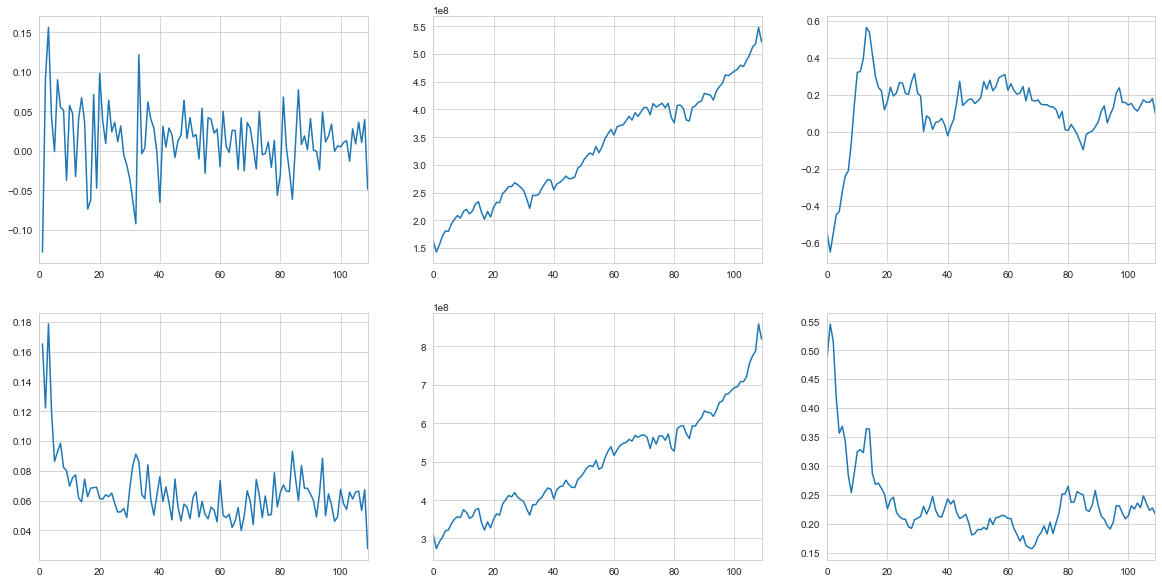

In [15]:
fig = plt.figure(figsize=(20,10))
#DF = DF.set_index('Date')
for i in range(1,7):
    plt.subplot(2,3,i)
    DF.iloc[:,i].plot()
    

In [16]:
ret

symbol,A,AAL,AAP,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,...,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2009-02-01,-0.265078,-0.687870,0.155851,-0.131481,-0.157946,-0.078064,-0.145214,-0.069422,-0.021734,-0.061881,...,-0.232031,-0.039784,0.132238,0.056426,-0.113967,-0.151800,-0.248307,-0.085298,-0.038650,-0.462396
2009-03-01,0.102689,-0.119100,0.072912,0.027943,0.007576,-0.060004,0.247515,0.044265,0.041152,0.038727,...,-0.066815,0.061712,0.528051,0.080391,0.002941,0.151489,-0.121547,0.044651,0.041393,0.047926
2009-04-01,0.172295,0.404147,0.062970,0.029565,-0.121714,0.068192,0.245793,0.099218,-0.120757,0.001137,...,0.380863,-0.010251,0.554895,0.064669,-0.021222,0.063840,0.294800,0.199984,0.186650,0.106072
2009-05-01,-0.001644,-0.384576,-0.026872,0.100707,0.073903,0.016847,0.029896,0.145714,0.116985,0.076803,...,0.194839,-0.072524,0.062170,0.022077,0.045361,0.022116,0.106996,0.037662,0.012650,0.226390
2009-06-01,0.108045,-0.059898,-0.024733,-0.044648,0.043004,0.111489,0.004249,0.015044,-0.027631,-0.061355,...,-0.140651,0.084434,0.132620,-0.013592,0.008042,0.045508,-0.041715,-0.037962,-0.044758,-0.168384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-01,0.060004,-0.014209,-0.193595,-0.072668,0.021052,0.062205,0.160546,0.057829,-0.039343,0.061550,...,0.028276,0.045444,0.025527,0.039584,0.016573,0.020848,-0.093779,0.011347,0.037959,-0.015378
2017-11-01,0.017630,0.077652,0.211577,0.102118,0.038703,0.038921,0.035390,-0.053258,-0.016447,-0.015604,...,-0.006381,0.041339,-0.041625,-0.053546,0.008492,0.092821,-0.021678,0.118129,-0.037873,0.067919
2017-12-01,-0.031122,0.030045,-0.013055,0.079299,0.012341,0.033746,-0.034934,0.033348,0.005003,0.029021,...,0.049565,-0.062670,-0.092914,-0.030529,0.004193,-0.016433,-0.008828,-0.022535,0.032031,0.025505


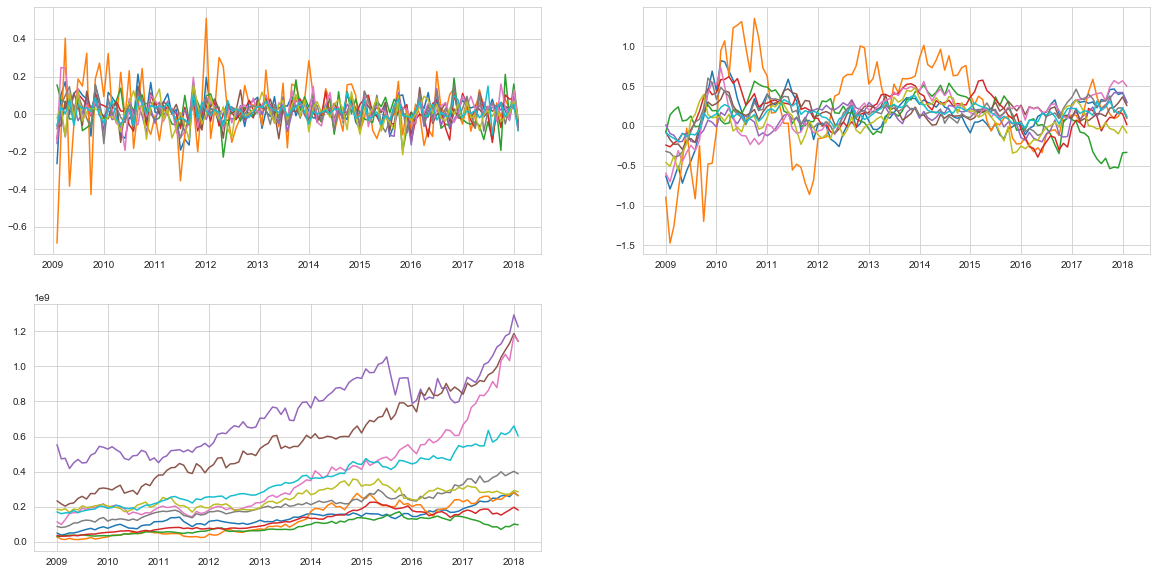

In [17]:
fig = plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.plot(ret.iloc[:,0:10])
#plt.ylabel('monthly returns')
plt.subplot(2,2,2)
plt.plot(m12.iloc[:,0:10])
#plt.ylabel('12 month returns')
plt.subplot(2,2,3)
plt.plot(mktcap.iloc[:,0:10])
#plt.ylabel('market captalization')

In [18]:
def Scale(y, c=True, sc=True):
    
    """
 If ‘scale’ is
 ‘TRUE’ then scaling is done by dividing the (centered) columns of
 ‘x’ by their standard deviations if ‘center’ is ‘TRUE’, and the
 root mean square otherwise.  If ‘scale’ is ‘FALSE’, no scaling is
 done.

 The root-mean-square for a (possibly centered) column is defined
 as sqrt(sum(x^2)/(n-1)), where x is a vector of the non-missing
 values and n is the number of non-missing values.  In the case
 ‘center = TRUE’, this is the same as the standard deviation, but
 in general it is not.
    """
    x = y.copy()

    if c:
        x -= x.mean()
    if sc and c:
        x /= x.std()
    elif sc:
        x /= np.sqrt(x.pow(2).sum().div(x.count() - 1))
    return x

In [19]:
scaled_mktcap = pd.DataFrame(Scale(mktcap.T))
scaled_m12 = pd.DataFrame(Scale(m12.T))
scaled_mktcap = scaled_mktcap.T
scaled_mktcap = scaled_mktcap.iloc[0:109,:]
scaled_m12 = scaled_m12.T
scaled_m12 = scaled_m12.iloc[0:109,:]

In [20]:
scaled_m12

symbol,A,AAL,AAP,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,...,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,-0.160403,-0.702239,0.954305,0.631610,1.151668,0.965773,-0.089429,0.471589,0.186602,0.955749,...,0.118415,0.981710,-4.347495,0.638311,0.930029,0.257343,-0.570704,0.806183,-0.439567,-1.455528
2009-02-01,-0.258782,-1.504062,1.446908,0.710768,1.017621,0.876365,-0.091845,0.577588,0.262251,0.958852,...,-0.604702,1.078100,-3.064800,0.812316,0.775787,0.242349,-0.692291,0.737507,-0.210769,-1.731399
2009-03-01,-0.218353,-1.375466,1.446287,0.647400,0.840728,0.621557,0.080618,0.311490,0.341060,0.766935,...,-1.037555,1.032024,-2.047995,0.704869,0.687922,0.376427,-1.203722,0.523732,-0.401871,-1.842005
2009-04-01,-0.129740,-0.883261,1.647004,0.651371,0.592771,0.529982,0.333355,0.170010,-0.274348,0.605327,...,-0.919690,0.905060,-1.836647,0.680334,0.325513,0.357449,-0.855365,0.658863,-0.174750,-2.301155
2009-05-01,-0.805655,0.007725,1.383031,0.936832,0.666269,0.383527,-0.044143,0.299312,0.239955,0.948338,...,-0.835866,0.738725,-2.030624,0.530842,0.578700,0.312335,-0.673594,0.895715,-0.168065,-1.932717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-01,0.784550,0.571753,-2.394246,-0.428361,0.518069,-0.078993,0.786736,0.763003,-0.445097,0.430802,...,-1.334252,0.143249,0.184853,0.655486,-0.723865,-0.558543,0.453653,0.010451,-1.035003,1.269875
2017-10-01,1.142786,-0.082220,-2.857813,-0.259264,0.704191,0.204903,1.275393,0.822897,-0.831162,0.563585,...,-1.082234,0.142327,0.013866,0.894814,-0.542507,-0.432591,0.051620,0.097115,-0.082449,0.819006
2017-11-01,1.294375,-0.283528,-2.873187,-0.243943,1.090172,0.321245,1.739368,0.047695,-0.888192,0.166274,...,-1.393965,0.648700,-0.278938,0.490449,-0.716415,-0.051237,0.203970,0.566970,-0.047686,0.299350


In [21]:
def PPS(x, wb, nt, ret, m12, mktcap, rr):
    wi = wb + nt*(x[0] * m12 + x[1]* mktcap)
    wret = (wi*ret).sum(axis=1)
    ut = ((1+wret)**(1-rr))/(1-rr)
    u = - (ut.mean())
    return u

In [22]:
Scaled_m12 = scaled_m12.reset_index()
Scaled_m12 = Scaled_m12.drop('Date',axis=1)
Scaled_mktcap = scaled_mktcap.reset_index()
Scaled_mktcap = Scaled_mktcap.drop('Date',axis=1)
Ret = ret.reset_index()
Ret = Ret.drop('Date',axis=1)

In [23]:
nt = wb = 1/np.shape(ret)[1]
rr = 5

In [24]:
res_save = []
weights = []
x0 = np.array([0 ,0])
for i in range(0,60):
    opt = sp.optimize.minimize(PPS, x0, method='BFGS', args=(wb, nt, Ret.iloc[0:48+i,:],
                                                            Scaled_m12.iloc[0:48+i,:], Scaled_mktcap.iloc[0:48+i,:],
                                                            rr))
    print('The {} window'.format(i+1))
    print('The value:', opt['x'])
    res_save.append(opt['x'])
    w = wb + nt*(opt['x'][0]*Scaled_m12.iloc[i + 48,:] + opt['x'][1]*Scaled_mktcap.iloc[i + 48,:])
    print(w)
    weights.append(w)

The 1 window
The value: [  0.44110625 -14.13608498]
symbol
A       0.013375
AAL     0.019283
AAP     0.016933
ABC     0.016244
ABT    -0.025398
          ...   
XRAY    0.014154
XRX     0.018134
YUM     0.008796
ZBH     0.010378
ZION    0.019420
Name: 48, Length: 453, dtype: float64
The 2 window
The value: [  0.45928615 -14.25119238]
symbol
A       0.013725
AAL     0.020314
AAP     0.016638
ABC     0.016758
ABT    -0.024944
          ...   
XRAY    0.014338
XRX     0.018095
YUM     0.008814
ZBH     0.010695
ZION    0.019118
Name: 49, Length: 453, dtype: float64
The 3 window
The value: [  0.51723057 -14.58208262]
symbol
A       0.014131
AAL     0.021166
AAP     0.017032
ABC     0.017024
ABT    -0.026590
          ...   
XRAY    0.014674
XRX     0.018907
YUM     0.008245
ZBH     0.011006
ZION    0.019124
Name: 50, Length: 453, dtype: float64
The 4 window
The value: [  0.48020615 -14.09532374]
symbol
A       0.014133
AAL     0.018695
AAP     0.016360
ABC     0.016814
ABT    -0.026588
    

Text(0.5, 1.0, 'mktcap')

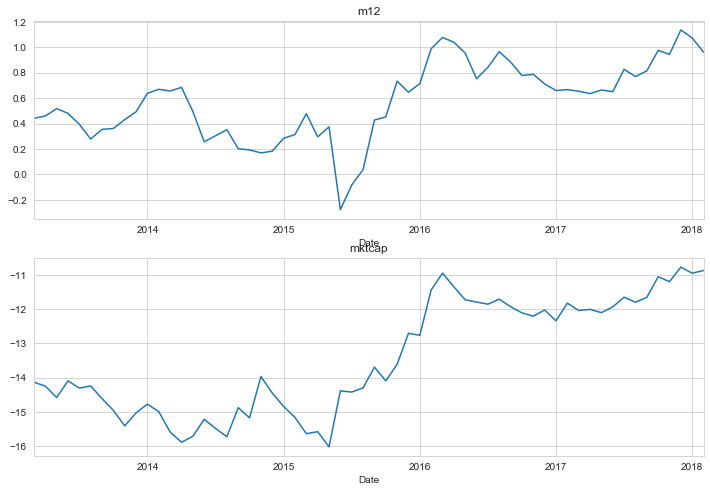

In [39]:
## Ploting m12 and mktcap
index = ret.index[49:110]
char_df = pd.DataFrame(res_save, index=index, columns=['m12','mktcap'])

fig = plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
char_df['m12'].plot()
plt.title('m12')
plt.subplot(2,1,2)
char_df['mktcap'].plot()
plt.title('mktcap')

In [109]:
weights = pd.DataFrame(weights)
ret_fit = (weights*Ret.tail(60)).sum(axis=1)
ret_EW = (nt*Ret.tail(60)).sum(axis=1)
acc_fit = ret_fit.cumsum()
acc_fitvalue = acc_fit.values
acc_EW = ret_EW.cumsum()
acc_EWvalue = acc_EW.values

In [110]:
index

DatetimeIndex(['2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01', '2013-09-01', '2013-10-01',
               '2013-11-01', '2013-12-01', '2014-01-01', '2014-02-01',
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01',
               '2016-11-01', '2016-12-01', '2017-01-01', '2017-02-01',
               '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01',
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
      

In [120]:
acc_ret = ret.tail(60).cumsum()
top100 = (np.argsort(-acc_ret.tail(1))).iloc[0,:].values[0:100]

acc_top100 = acc_ret.iloc[:,top100].mean(axis=1)
acc_top100value = acc_top100.values

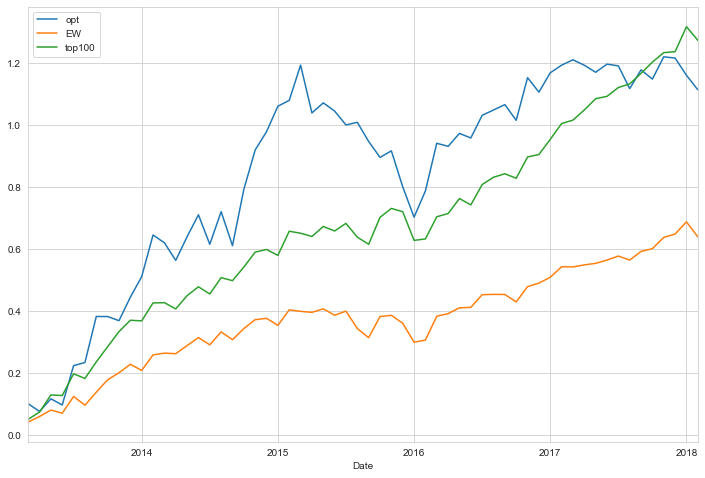

In [121]:
acc_df = pd.DataFrame(index=index)
acc_df['opt'] = acc_fitvalue
acc_df['EW'] = acc_EWvalue
acc_df['top100'] = acc_top100value
acc_df.plot(figsize=(12,8))

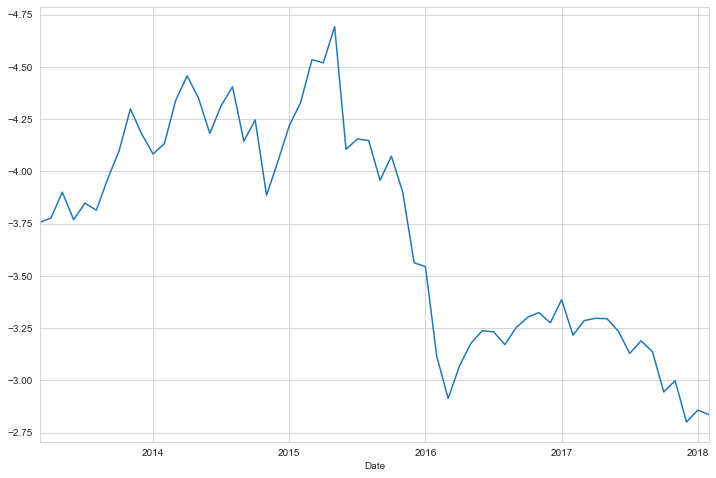

In [248]:
weights.index = index
lv = (weights[weights < 0]).sum(axis=1).reindex(index)
lv.plot(figsize=(12,8))
plt.gca().invert_yaxis()

In [158]:
def PPS1(x, wb, nt, ret, m12, mktcap, rr):
    wi = wb + nt*(x[0] * m12 + x[1]* mktcap)
    #print(wi.head())
    #print("---------------------------------")
    wret = (wi*ret).sum(axis=1)
    #print(wret.head())
    #print("---------------------------------")
    ut = ((1+wret)**(1-rr))/(1-rr)
    #print(ut.head())
    #print("---------------------------------")
    u = - (ut.mean())
    #print(u)
    #print("---------------------------------")
    Lv = abs((wi[wi<0]).sum(axis=1))
    #print(Lv.head())
    #print("---------------------------------")
    pen = abs((Lv[Lv>2]*Lv).sum())
    #print(pen)
    #print("---------------------------------")
    return (u+pen)

In [160]:
PPS1(guess, wb=wb, nt=nt, ret=Ret.iloc[1:49,:], m12=Scaled_m12.iloc[1:49,:], mktcap=Scaled_mktcap.iloc[1:49,:],rr=rr)

0.23546102682972428

In [172]:
nt = wb = 1/np.shape(ret)[1]
rr = 5
guess = np.array([0,0])
res_save_pen_u = []
weights_pen_u = []
for i in range(0,60):
    opt = sp.optimize.minimize(PPS1, guess, method='BFGS', args=(wb, nt, Ret.iloc[0:48+i,:],
                                                            Scaled_m12.iloc[0:48+i,:], Scaled_mktcap.iloc[0:48+i,:],
                                                            rr))
    print('The {} window'.format(i+1))
    print('The value:', opt['x'])
    res_save_pen_u.append(opt['x'])
    w = wb + nt*(opt['x'][0]*Scaled_m12.iloc[i + 48,:] + opt['x'][1]*Scaled_mktcap.iloc[i + 48,:])
    print(w)
    weights_pen_u.append(w)

The 1 window
The value: [-0.98463926 -7.75829232]
symbol
A       0.010038
AAL     0.006331
AAP     0.013510
ABC     0.010038
ABT    -0.014698
          ...   
XRAY    0.009805
XRX     0.012754
YUM     0.007808
ZBH     0.006089
ZION    0.009373
Name: 48, Length: 453, dtype: float64
The 2 window
The value: [-0.89562686 -7.84320463]
symbol
A       0.011211
AAL     0.006029
AAP     0.013760
ABC     0.008849
ABT    -0.014044
          ...   
XRAY    0.009971
XRX     0.012941
YUM     0.007845
ZBH     0.005915
ZION    0.010265
Name: 49, Length: 453, dtype: float64
The 3 window
The value: [-0.5156877  -7.78199353]
symbol
A       0.010532
AAL     0.006442
AAP     0.012242
ABC     0.009084
ABT    -0.013584
          ...   
XRAY    0.009810
XRX     0.011836
YUM     0.006675
ZBH     0.006874
ZION    0.011334
Name: 50, Length: 453, dtype: float64


In [224]:
#weights_pen = pd.DataFrame(weights_pen)
ret_fit_pen = (weights_pen*Ret.tail(60)).sum(axis=1)
ret_EW_pen = (nt*Ret.tail(60)).sum(axis=1)
acc_fit_pen = ret_fit_pen.cumsum()
acc_fitpenvalue = acc_fit_pen.values
acc_EW_pen = ret_EW_pen.cumsum()
acc_EWpenvalue = acc_EW_pen.values

In [240]:
lv1 = weights_pen[weights_pen<0].sum(axis=1)
lv1 = lv1.values

In [241]:
lv1

array([-1.97782453, -1.99727995, -1.9826857 , -1.992283  , -1.93908277,
       -1.94446153, -1.88796746, -1.93669834, -1.97816838, -1.96718861,
       -1.97268993, -1.96574826, -1.78918145, -1.85825985, -1.96855894,
       -1.8777141 , -1.83364792, -1.83021516, -1.93659152, -1.95031872,
       -1.96873511, -1.9182096 , -1.91752919, -1.99771831, -1.97240837,
       -1.91999862, -1.99720745, -1.9078821 , -1.95970567, -1.96300761,
       -1.98503758, -1.90480402, -1.82084338, -1.80581264, -1.92064686,
       -1.8815047 , -1.76217269, -1.89570649, -1.85179622, -1.88975225,
       -1.82045373, -1.86747855, -1.81324818, -1.86835111, -1.86210215,
       -1.87613802, -1.88398576, -1.91527114, -1.91000457, -1.8898289 ,
       -1.84867766, -1.85289558, -1.74881861, -1.79179134, -1.77468835,
       -1.80869881, -1.85859764, -1.74717615, -1.80281986, -1.8082278 ])

In [242]:
df_pen = pd.DataFrame(index=index)
df_pen['lv'] = lv
df_pen['lv_pen'] = lv1

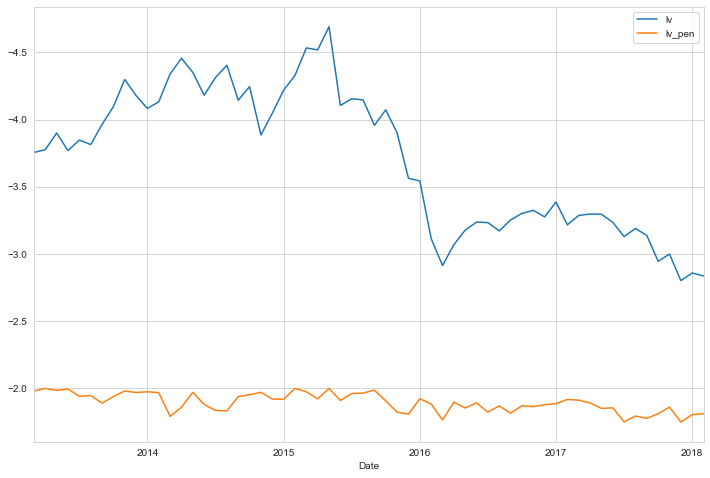

In [247]:
df_pen.plot(figsize=(12,8))
plt.gca().invert_yaxis()

In [252]:
acc_df_pen = pd.DataFrame()
acc_df_pen['opt'] = acc_fitvalue
acc_df_pen['opt_pen'] = acc_fitpenvalue
acc_df_pen['EW'] = acc_EWpenvalue
acc_df_pen['top100'] = acc_top100value

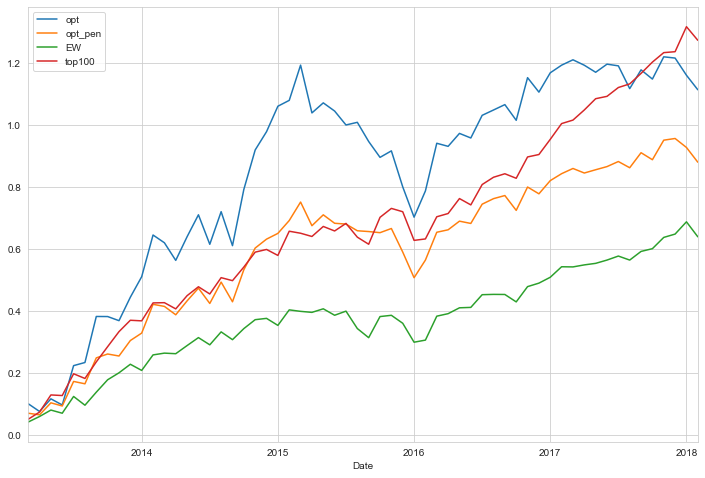

In [256]:
acc_df_pen.index = index
acc_df_pen.plot(figsize=(12,8))